## Repairing artifacts with ICA
ICA(Independent components analysis)를 이용하여 다양한 노이즈(눈 깜빡임 등등)를 제거해 보자!  
  
Tutorial과 동일한 sample data 사용  

*꼭 ICA만 쓰는게 아니라, 데이터에 알맞는 artifact removal tool을 사용하세요!!

In [2]:
import os

import mne
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_filt-0-40_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file)

# Here we'll crop to 60 seconds and drop gradiometer channels for speed
raw.crop(tmax=60.0).pick(picks=["mag", "eeg", "stim", "eog"])
raw.load_data()

Using default location ~/mne_data for sample...
Creating /Users/seayul/mne_data


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 1.80TB/s]
Untarring contents of '/Users/seayul/mne_data/MNE-sample-data-processed.tar.gz' to '/Users/seayul/mne_data'


Attempting to create new mne-python configuration file:
/Users/seayul/.mne/mne-python.json
Download complete in 06m21s (1576.2 MB)
Opening raw data file /Users/seayul/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 9009  =      0.000 ...    59.999 secs...


<Raw | sample_audvis_filt-0-40_raw.fif, 172 x 9010 (60.0 s), ~14.9 MB, data loaded>

### What is ICA?
여러 가지 독립적인 source signal들이 알 수 없는 비율로 합쳐져(섞여) 있을 때 각 독립적인 source signal들을 분리해 내는 계산 방법  
  
EEG/MEG 데이터 역시 여러 개의 채널을 통해 데이터를 기록하고, 각 데이터는 여러 가지 독립적인 신호들(눈 깜빡임에 의한 신호, 심장 박동, 실제 뇌파 등...)로 이루어져 있으며, 각 신호들은 통계적으로 독립이며 non-gaussian이라 ICA를 통한 구분이 가능하다. 

Example : EOG and ECG artifact repait

Using matplotlib as 2D backend.


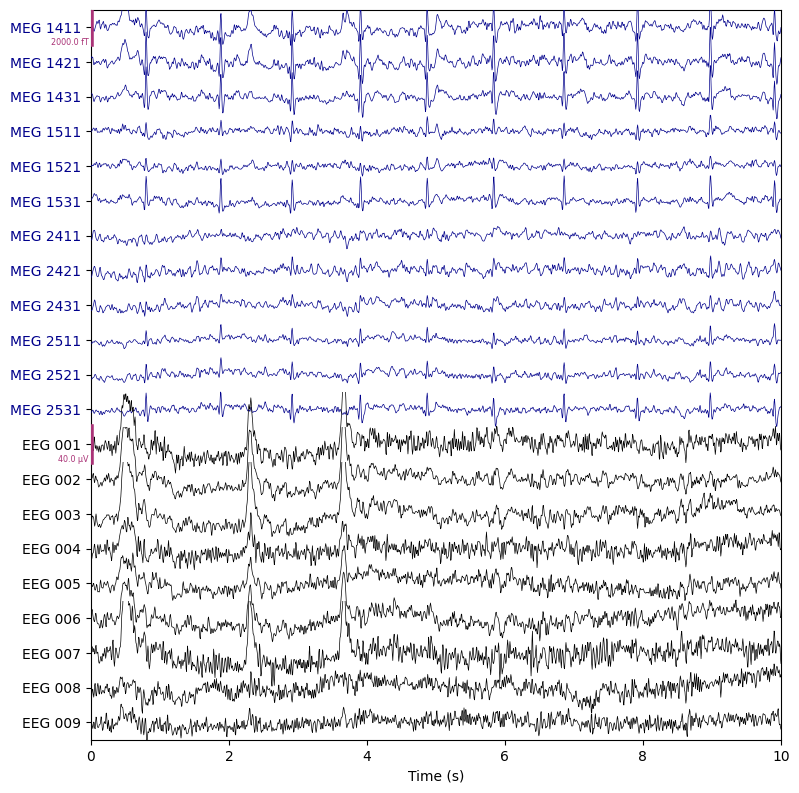

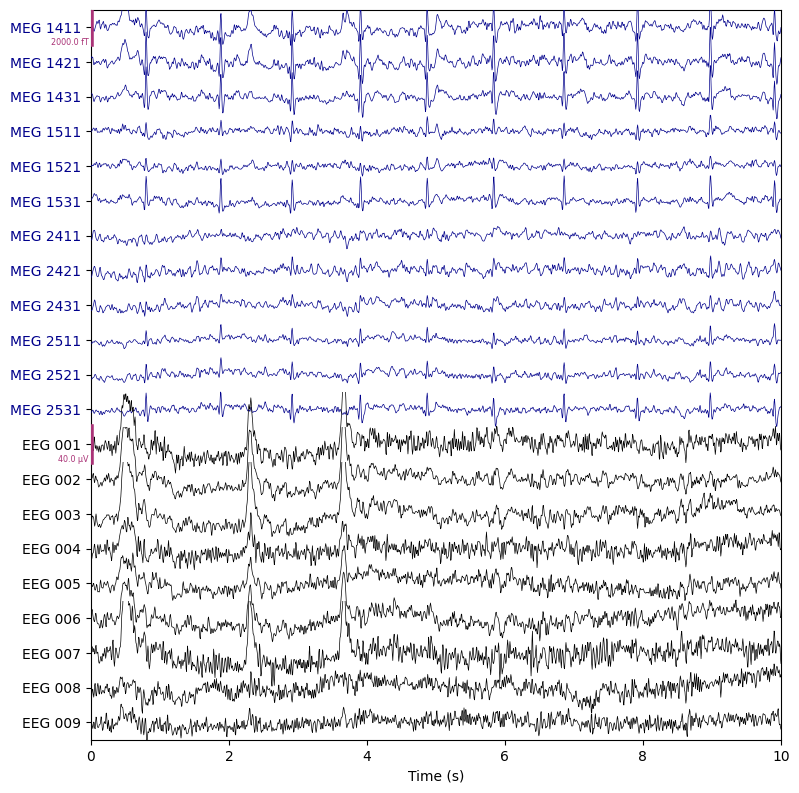

In [3]:
# pick some channels that clearly show heartbeats and blinks
regexp = r"(MEG [12][45][123]1|EEG 00.)"
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
raw.plot(order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False)

In [4]:
eog_evoked = create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

Using EOG channel: EOG 061
EOG channel index for this subject is: [171]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG 061 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1502 samples (10.003 s)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 4)
Using data from preloaded Raw for 10 events and 151 original time points 

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 800x420 with 6 Axes>

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 800x420 with 6 Axes>

[<Figure size 800x420 with 6 Axes>, <Figure size 800x420 with 6 Axes>]